<a href="https://colab.research.google.com/github/SusanMahato/ml_Lab/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-4131361432>:19: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  fig = plt.figure(1, figsize=(8, 6))


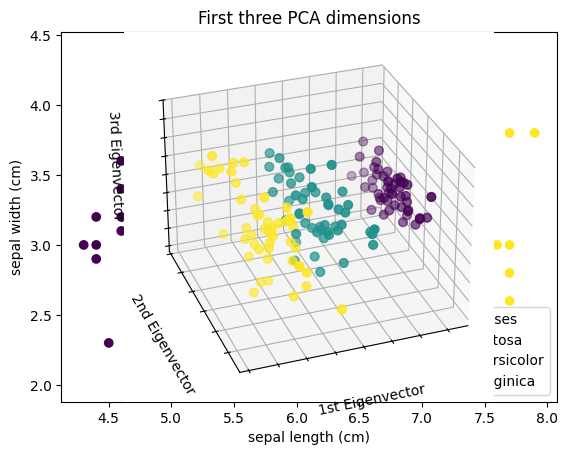

In [5]:
from sklearn import datasets

iris = datasets.load_iris()

import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

=== KNN — Accuracy: 0.91 ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45

=== SVM — Accuracy: 0.93 ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



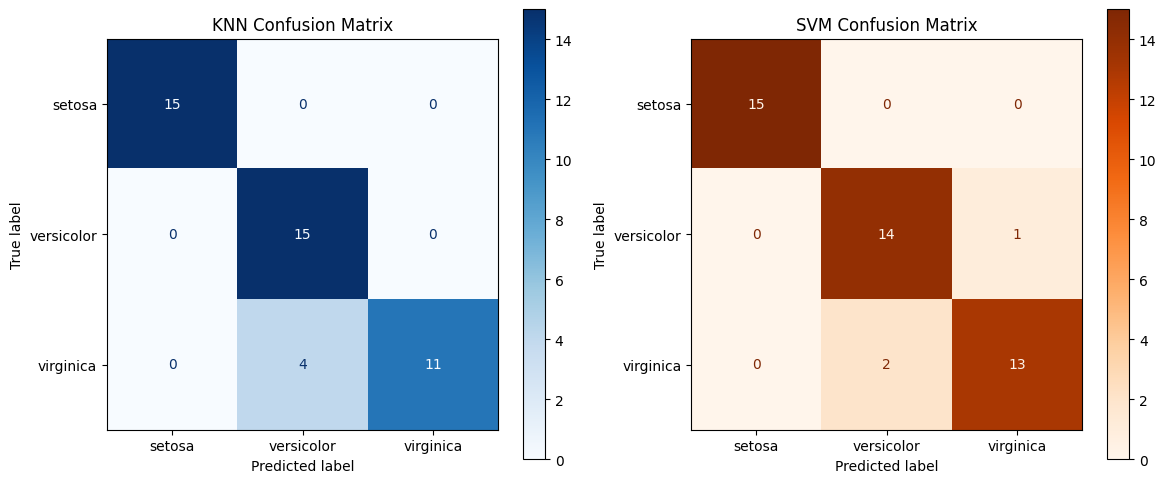

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# ─── 1. Load Data ─────────────────────────────────────
iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names

# ─── 2. Split Dataset ────────────────────────────────
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ─── 3. Feature Scaling ───────────────────────────────
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# ─── 4. Initialize Classifiers ───────────────────────
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf', C=1.0, gamma='scale')

# ─── 5. Train Models ──────────────────────────────────
knn.fit(X_train_s, y_train)
svm.fit(X_train_s, y_train)

# ─── 6. Predict on Test Set ───────────────────────────
y_pred_knn = knn.predict(X_test_s)
y_pred_svm = svm.predict(X_test_s)

# ─── 7. Print Accuracy & Classification Reports ──────
for name, y_pred in [('KNN', y_pred_knn), ('SVM', y_pred_svm)]:
    acc = accuracy_score(y_test, y_pred)
    print(f'=== {name} — Accuracy: {acc:.2f} ===')
    print(classification_report(y_test, y_pred, target_names=class_names))

# ─── 8. Confusion Matrices ───────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_knn,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
    ax=axes[0]
)
axes[0].set_title('KNN Confusion Matrix')

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_svm,
    display_labels=class_names,
    cmap=plt.cm.Oranges,
    normalize=None,
    ax=axes[1]
)
axes[1].set_title('SVM Confusion Matrix')

plt.tight_layout()
plt.show()


=== KNN — Accuracy: 0.69 ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.52      0.73      0.61        15
   virginica       0.56      0.33      0.42        15

    accuracy                           0.69        45
   macro avg       0.69      0.69      0.68        45
weighted avg       0.69      0.69      0.68        45

=== SVM — Accuracy: 0.69 ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.53      0.60      0.56        15
   virginica       0.54      0.47      0.50        15

    accuracy                           0.69        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.69      0.69      0.69        45



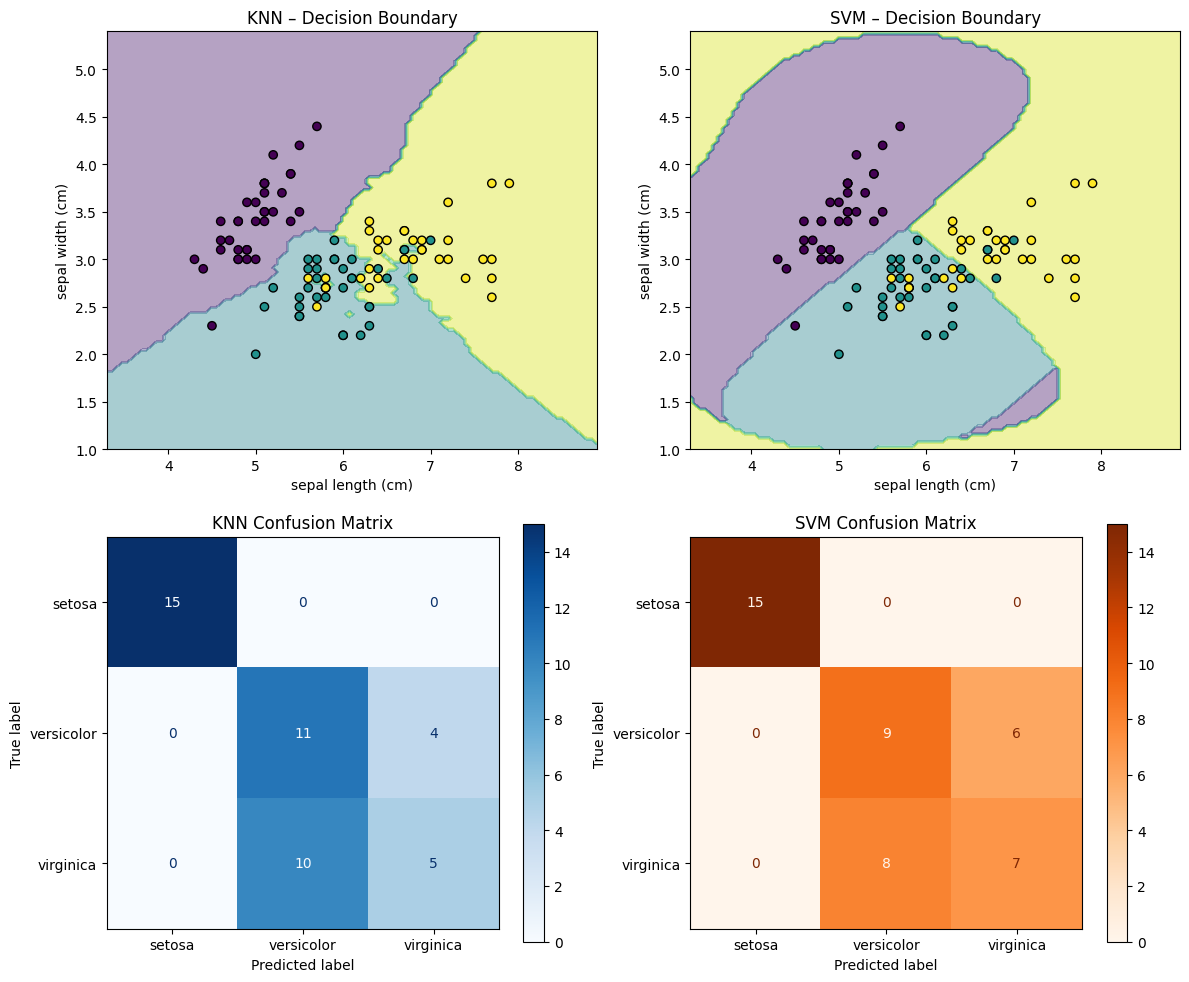

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import Pipeline

# ─── 1. Load the data ───────────────────────────────────
iris = load_iris()
# Only take the first two features (sepal length & sepal width)
X = iris.data[:, :2]
y = iris.target
class_names = iris.target_names

# ─── 2. Split into train/test sets ─────────────────────
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ─── 3. Define pipelines ───────────────────────────────
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

# ─── 4. Train models ────────────────────────────────────
knn_pipe.fit(X_train, y_train)
svm_pipe.fit(X_train, y_train)

# ─── 5. Predict and evaluate ────────────────────────────
y_pred_knn = knn_pipe.predict(X_test)
y_pred_svm = svm_pipe.predict(X_test)

for name, y_pred in [('KNN', y_pred_knn), ('SVM', y_pred_svm)]:
    print(f'=== {name} — Accuracy: {accuracy_score(y_test, y_pred):.2f} ===')
    print(classification_report(y_test, y_pred, target_names=class_names))

# ─── 6. Plot confusion matrices ────────────────────────
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Decision boundaries and training scatter
for ax, (name, model) in zip(axes[0], [('KNN', knn_pipe), ('SVM', svm_pipe)]):
    DecisionBoundaryDisplay.from_estimator(
        model,
        X_train,
        response_method="predict",
        plot_method="contourf",
        alpha=0.4,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1]
    )
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.viridis)
    ax.set_title(f'{name} – Decision Boundary')

# Confusion matrices
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn,
                                        display_labels=class_names,
                                        cmap=plt.cm.Blues,
                                        ax=axes[1,0])
axes[1,0].set_title('KNN Confusion Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm,
                                        display_labels=class_names,
                                        cmap=plt.cm.Oranges,
                                        ax=axes[1,1])
axes[1,1].set_title('SVM Confusion Matrix')

plt.tight_layout()
plt.show()
